<a href="https://colab.research.google.com/github/RamziRBM/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

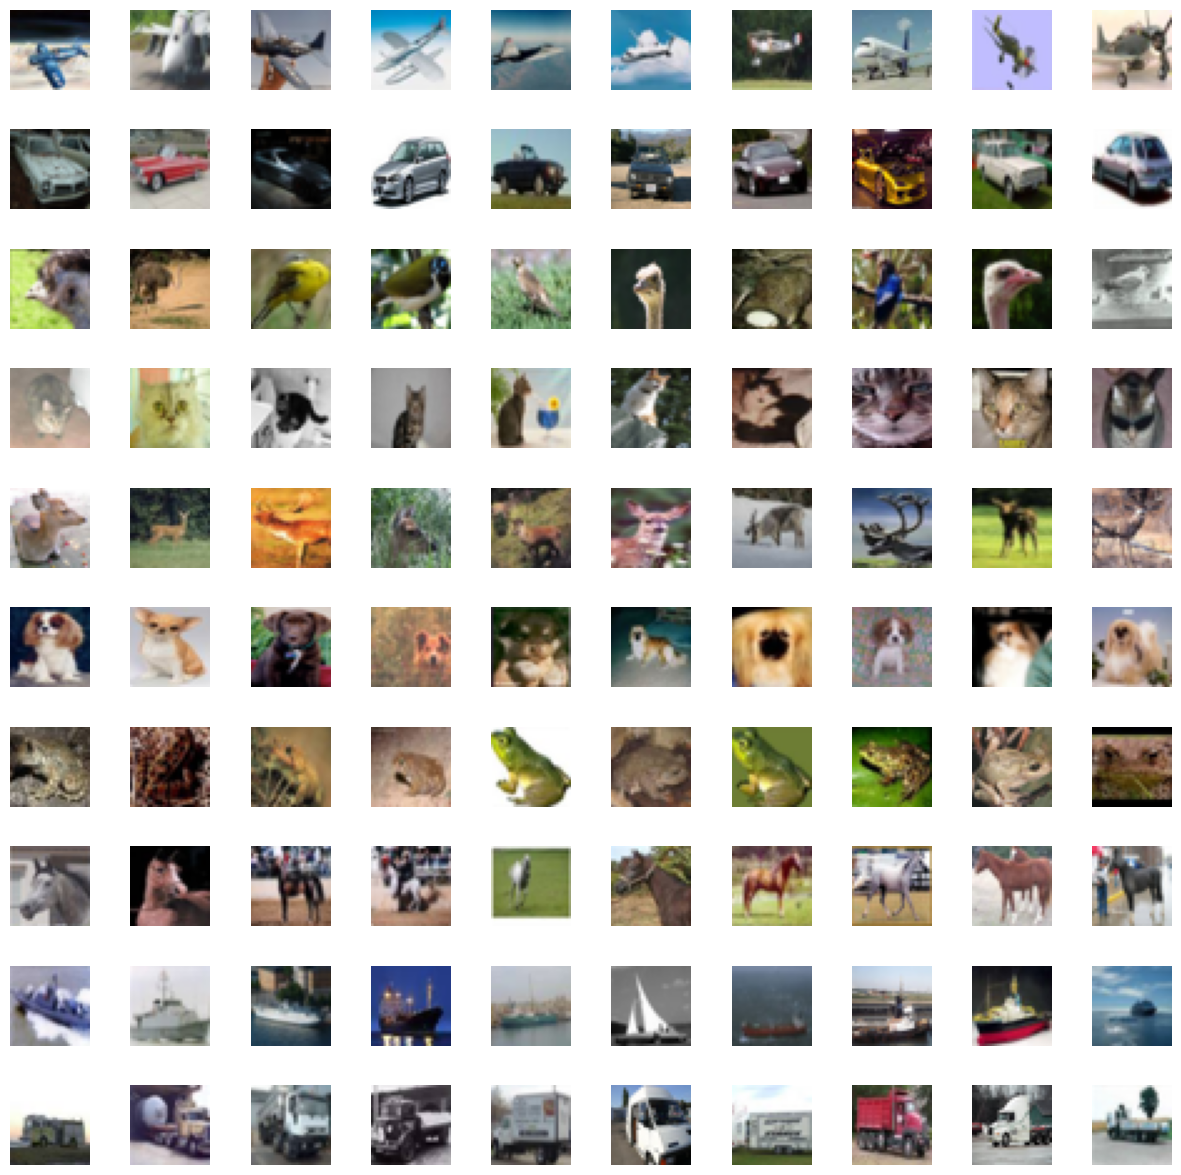

x_train shape: (50000, 32, 32, 3)
(50000, 32, 32, 3) (50000, 10)


In [2]:
from matplotlib import image
from matplotlib import pyplot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for class_idx in range(10):
    # Find all indices for the current class
    class_indices = np.where(y_train.flatten() == class_idx)[0]
    # Pick 10 random samples from this class
    random_indices = np.random.choice(class_indices, 10, replace=False)

    for i, img_idx in enumerate(random_indices):
        ax = axes[class_idx, i]
        ax.imshow(x_train[img_idx])
        ax.axis('off')


plt.show()

x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
print("x_train shape:", x_train.shape)


y_train = y_train.flatten()
y_test = y_test.flatten()
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print(x_train.shape, y_train_onehot.shape)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
from keras.backend import clear_session
clear_session()
from keras import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
from keras.optimizers import SGD
model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.1433 - loss: 2.2844 - val_accuracy: 0.2083 - val_loss: 2.2030
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2330 - loss: 2.1730 - val_accuracy: 0.2618 - val_loss: 2.0906
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2731 - loss: 2.0634 - val_accuracy: 0.2746 - val_loss: 2.0264
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2993 - loss: 1.9861 - val_accuracy: 0.2570 - val_loss: 2.0381
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3223 - loss: 1.9415 - val_accuracy: 0.3297 - val_loss: 1.9251
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3431 - loss: 1.8997 - val_accuracy: 0.3248 - val_loss: 1.9180
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3468 - loss: 1.8734 - val_accuracy: 0.3312 - val_loss: 1.8898
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3551 - loss: 1.8498 - val_accuracy: 0.3009 - v

*   Plot the cross entropy loss curve and the accuracy curve

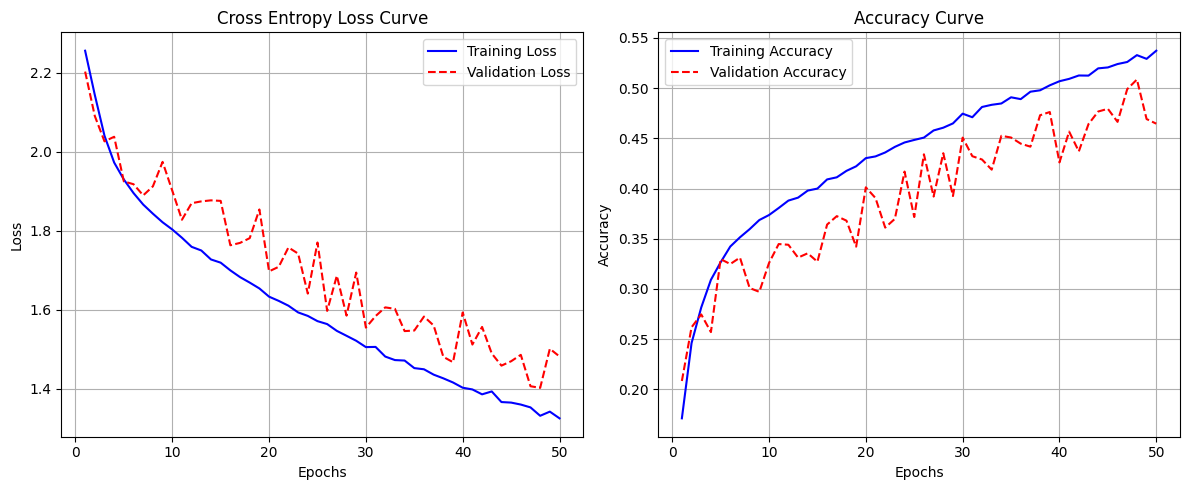

In [6]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),

    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
model2.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history2 = model2.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_split=0.2
)



Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.1403 - loss: 2.2785 - val_accuracy: 0.1669 - val_loss: 2.1993
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2343 - loss: 2.1501 - val_accuracy: 0.1935 - val_loss: 2.1518
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2697 - loss: 2.0476 - val_accuracy: 0.2549 - val_loss: 2.0112
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3058 - loss: 1.9724 - val_accuracy: 0.2814 - val_loss: 2.0246
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3362 - loss: 1.9058 - val_accuracy: 0.2412 - val_loss: 2.2413
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3380 - loss: 1.8860 - val_accuracy: 0.3316 - val_loss: 1.8599
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3647 - loss: 1.8053 - val_accuracy: 0.3508 - val_loss: 1.8316
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3803 - loss: 1.7732 - val_accuracy: 0.3348 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


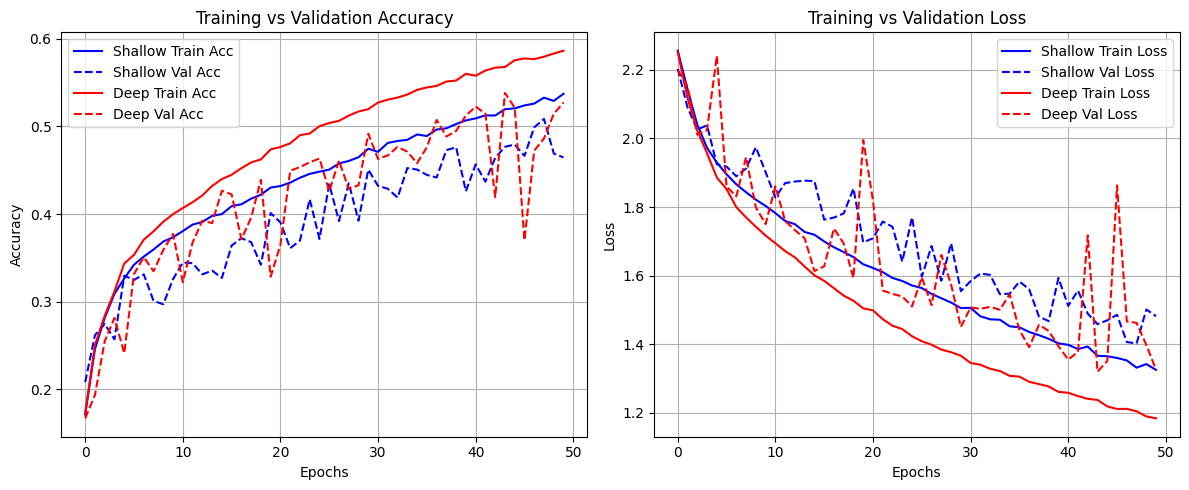

In [10]:


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'b-', label='Shallow Train Acc')
plt.plot(history.history['val_accuracy'], 'b--', label='Shallow Val Acc')
plt.plot(history2.history['accuracy'], 'r-', label='Deep Train Acc')
plt.plot(history2.history['val_accuracy'], 'r--', label='Deep Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss comparison ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'b-', label='Shallow Train Loss')
plt.plot(history.history['val_loss'], 'b--', label='Shallow Val Loss')
plt.plot(history2.history['loss'], 'r-', label='Deep Train Loss')
plt.plot(history2.history['val_loss'], 'r--', label='Deep Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1000x800 with 0 Axes>

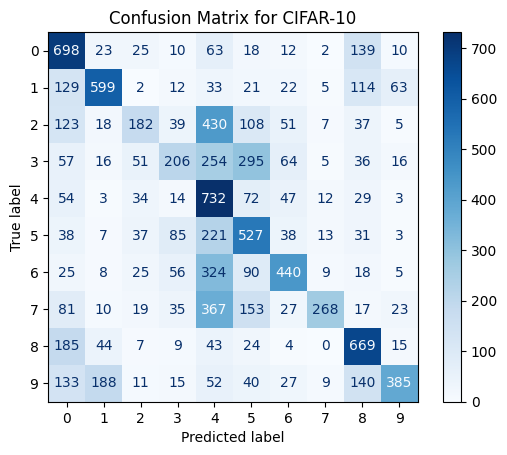

In [11]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()



**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [12]:


test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4759 - loss: 1.4645
Test Loss: 1.4649
Test Accuracy: 0.4706


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [13]:
from keras.backend import clear_session
clear_session()

In [18]:
from tensorflow.keras.layers import RandomContrast, RandomFlip, RandomRotation, BatchNormalization

model3 = Sequential([
    RandomContrast(factor=0.10),
    RandomFlip("horizontal"),
    RandomRotation(factor=0.10),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    layers.Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [19]:
model3.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    x_train, y_train_onehot,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.2746 - loss: 2.1566 - val_accuracy: 0.0997 - val_loss: 2.3532
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.4228 - loss: 1.5999 - val_accuracy: 0.1070 - val_loss: 2.6313
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.4842 - loss: 1.4454 - val_accuracy: 0.1298 - val_loss: 2.9582
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.5071 - loss: 1.3785 - val_accuracy: 0.1756 - val_loss: 2.8191
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.5326 - loss: 1.3079 - val_accuracy: 0.3007 - val_loss: 2.1324
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.5387 - loss: 1.2875 - val_accuracy: 0.4149 - val_loss: 1.6660
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5564 - loss: 1.2299 - val_accuracy: 0.5504 - val_loss: 1.2756
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.5796 - loss: 1.1777 - val_accuracy: 0

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
